In [390]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# Running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

# Bellabeat Data Analysis using Python

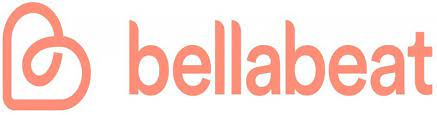

# Scenario

Bellabeat is a high-tech manufacturer of health-focused products for women, founded by Urška Sršen and Sando Mur. They aim to gain insights from smart device data usage to better understand consumer behavior and make informed decisions regarding their marketing strategies.

# Business Objective:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

# Deliverables:
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

# 1. Ask phase

* Business Task

Analyze smart device data usage and provide recommendations for Bellabeat's marketing strategy. By examining how consumers interact with Bellabeat's smart devices, it will be possible to identify trends, patterns, and valuable insights. These insights will guide future marketing campaigns, enhance customer engagement, and drive growth in the competitive smart device market.

* Key Steakholders
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer.
2. Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.
3. Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. 

# 2. Prepare phase

2.1 Information about the data source

[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)

- Data Source: Publicly available dataset on Kaggle, consisting of 18 CSV files.
- Data Generation: Respondents from a distributed survey via Amazon Mechanical Turk.
- Collection Period: March 12, 2016, to May 12, 2016.
- Participants: Data collected from 30 Fitbit users who consented to submitting personal tracker data.
- Data Contents: Minute-level output for physical activity, heart rate, and sleep monitoring.
- User Habits: Provides insights into daily activity, steps, and heart rate to explore user habits.
- Consent: Users provided consent for the submission of personal tracker data.
- Data Contents: Includes physical activity, heart rate, sleep monitoring, daily activity, and steps recorded.


2.2 Limitations of the data
- There are limitations mentioned for this dataset. The data is from 2016, which may not be timely or relevant. The sample size of 30 FitBit users is small and may not be representative of the entire population. 
- Additional data may be required to address limitations and enhance analysis.
- The data's reliability, accuracy, and credibility are uncertain, since it's provided from a survey.

2.3 Is Data ROCCC (Reliable, Original, Comprehensive, Current, and Cited)?

- Reliable: The reliability of the data may be considered low, as it was generated by respondents from a distributed survey and collected through Amazon Mechanical Turk. The data's accuracy and reliability cannot be verified directly.

- Original: The originality of the data is low, as it was obtained from a third-party source (Amazon Mechanical Turk) and does not have a clear indication of its source or origin.

- Comprehensive: The data can be considered moderately comprehensive, as it covers parameters related to physical activity, heart rate, sleep monitoring, daily activity, and steps, which align with Bellabeat's products' parameters.

- Current: The data is not current, as it was collected between March 12, 2016, and May 12, 2016, which makes it over five years old and potentially outdated for analyzing current trends or behaviors.

- Cited: The data does not have a clear citation or reference to its source, which raises concerns about its credibility and citation.

Overall, the data does not fulfill the ROCCC criteria, indicating potential issues with reliability, originality, and currentness.

2.4 Importing the required libraries

In [430]:
import numpy as np # data arrays
import pandas as pd # data analysis and data manipulation
import datetime as dt #date time
import glob #retrieving file paths
import os #to perform operations related to file and directory handling
import seaborn as sns  # Importing seaborn library for statistical data visualization
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for creating static visualizations
import plotly.express as px  # Importing plotly.express for creating interactive and dynamic visualizations

2.5 Data to be analized 

- Data was chosen based on the search for insights related to smart device usage, physical activity, sleep patterns, weight management, and calorie intake.
    * daily_activity: to identify trends in activity levels throughout the day, such as peak active hours and sedentary periods.
    * daily_intensities: to analyze different intensity levels of physical activity and identify patterns of light, moderate, and high-intensity activities.
    * daily_calories: to understand trends in daily calorie consumption and to explore correlations between calorie intake and factors like activity levels, sleep duration, or weight changes.
    * daily_steps: to examine trends in step counts and identify days with higher or lower activity levels.
    * sleep_day: to understand sleep patterns and identify any correlations between sleep quality and activity levels.
    * weight_log: to track weight changes over time and identify trends in weight loss or gain and to investigate correlations between weight changes and factors like activity levels, sleep duration, or calorie intake.


2.6 Loading the data into a pandas DataFrame

- Loading data into a pandas DataFrame enables easy data manipulation, analysis, and visualization, facilitating tasks such as organizing data, performing operations, analyzing statistics, cleaning data, creating visualizations, and integrating with other libraries.

In [432]:
# Loading data frames using pd.read to read CSV files into a pandas DataFrame
daily_activity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
sleepday = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
daily_calories = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
daily_intensities = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
weight_log = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')
daily_steps = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')

In [433]:
# Check for unique users
print("Daily Activity Dataset:",daily_activity.Id.nunique(), "unique users")
print("SleepDay Dataset:",sleepday.Id.nunique(), "unique users")
print("Daily Calories Dataset:",daily_calories.Id.nunique(), "unique users")  
print("Daily Intensities Dataset:",daily_intensities.Id.nunique(), "unique users")
print("Weight Log Dataset:",weight_log.Id.nunique(), "unique users")
print("Daily Steps Dataset:",daily_steps.Id.nunique(), "unique users")

Daily Activity Dataset: 33 unique users
SleepDay Dataset: 24 unique users
Daily Calories Dataset: 33 unique users
Daily Intensities Dataset: 33 unique users
Weight Log Dataset: 8 unique users
Daily Steps Dataset: 33 unique users


In [434]:
# Check the dataframe columns
print("Daily Activity:",daily_activity.columns)
print("Sleepday:",sleepday.columns)
print("Daily Calories:",daily_calories.columns)
print("Daily Intensities:",daily_intensities.columns)
print("Weight Log:",weight_log.columns)
print("Daily Steps:",daily_steps.columns)


Daily Activity: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Sleepday: Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')
Daily Calories: Index(['Id', 'ActivityDay', 'Calories'], dtype='object')
Daily Intensities: Index(['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance',
       'LightActiveDistance', 'ModeratelyActiveDistance',
       'VeryActiveDistance'],
      dtype='object')
Weight Log: Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId'],
      dtype='object')
Daily Steps: Ind

# 3. Process phase
3.1 Data transformation

In [435]:
# Transform Date to DateTime data type
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
daily_intensities['ActivityDay'] = pd.to_datetime(daily_intensities['ActivityDay'])
daily_calories['ActivityDay'] = pd.to_datetime(daily_calories['ActivityDay'])
daily_steps['ActivityDay'] = pd.to_datetime(daily_steps['ActivityDay'])
sleepday['SleepDay'] = pd.to_datetime(sleepday['SleepDay'])
weight_log['Date'] = pd.to_datetime(weight_log['Date'])

In [436]:
# Check the changes
print("Daily Activity data type is", daily_activity["ActivityDate"].dtypes, "data type")
print("Daily Intensities data type is", daily_intensities["ActivityDay"].dtypes, "data type")
print("Daily Steps data type is", daily_steps["ActivityDay"].dtypes, "data type")
print("Daily Calories data type is", daily_calories["ActivityDay"].dtypes, "data type")
print("Sleepday data type is", sleepday["SleepDay"].dtypes, "data type")
print("Weight log data type is", weight_log["Date"].dtypes, "data type")

Daily Activity data type is datetime64[ns] data type
Daily Intensities data type is datetime64[ns] data type
Daily Steps data type is datetime64[ns] data type
Daily Calories data type is datetime64[ns] data type
Sleepday data type is datetime64[ns] data type
Weight log data type is datetime64[ns] data type


In [437]:
# Handle missing values, and remove duplicates as needed

# 1. daily_activity:
daily_activity.dropna(inplace=True)  # Handle missing values by removing rows with missing values
daily_activity.drop_duplicates(inplace=True)  # Remove duplicates based on all columns

# 2. daily_intensities:
daily_intensities.dropna(inplace=True)  # Handle missing values by removing rows with missing values
daily_intensities.drop_duplicates(subset=['ActivityDay'], inplace=True)  # Remove duplicates based on 'ActivityDay' column since it uniquely identifies each entry

# 3. daily_calories:
daily_calories.dropna(inplace=True)  # Handle missing values by removing rows with missing values
daily_calories.drop_duplicates(subset=['ActivityDay','Calories'], inplace=True)  # Remove duplicates based on 'ActivityDay' and 'Calories' columns since it represents the values that should not be duplicated

# 4. daily_steps:
daily_steps.dropna(inplace=True)  # Handle missing values by removing rows with missing values
daily_steps.drop_duplicates(subset=['ActivityDay', 'StepTotal'], inplace=True)  # Remove duplicates based on 'StepTotal' column

# 5. sleep_day:
sleepday.dropna(inplace=True)  # Handle missing values by removing rows with missing values
sleepday['TotalMinutesAsleep'] = sleepday['TotalMinutesAsleep'] / 60  # Convert 'TotalMinutesAsleep' from minutes to hours
sleepday.drop_duplicates(subset=['TotalMinutesAsleep', 'SleepDay'], inplace=True)  # Remove duplicates based on the combination of 'TotalMinutesAsleep' and 'TotalTimeInBed' columns to ensure that only unique sleep records are kept in the dataset

# 6. weight_log:
weight_log.fillna(method='ffill', inplace=True) #Handle missing values by imputing with the previous non-missing value
 #Remove duplicates based on the 'LogId' column since it represents unique log entries:
weight_log.dropna(subset=['Fat', 'BMI', 'IsManualReport'], inplace=True)



In [438]:
#Merge daily_steps with daily_calories datasets.

for col in daily_steps.columns, daily_calories.columns:
    print (col)

Index(['Id', 'ActivityDay', 'StepTotal'], dtype='object')
Index(['Id', 'ActivityDay', 'Calories'], dtype='object')


Above we can see that they both share Id and ActivityDay in common. Therefore, we can merge them on Id and ActivityDay columns.

In [439]:
merge_df = pd.merge(daily_steps, daily_calories,
                    on=['Id', 'ActivityDay'], how='inner')

merge_df.head()

,Id,ActivityDay,StepTotal,Calories
0,1503960366,2016-04-12,13162,1985
1,1503960366,2016-04-13,10735,1797
2,1503960366,2016-04-14,10460,1776
3,1503960366,2016-04-15,9762,1745
4,1503960366,2016-04-16,12669,1863


Now we have a new dataframe merge_df

* Create new colums

Create a new column (WeekDay) from the ActivityDay in the new dataset merged_df, and ActivityDate in daily_activity. Do the same with SleepDay in sleepday dataset, Date in weight_log dataset, and ActivityDay in daily_intensities dataset. 
This addition will allow us to examine whether the days of the week contribute to our analysis.

In [440]:
daily_activity["WeekDay"] = daily_activity["ActivityDate"].dt.day_name()
merge_df["WeekDay"] = merge_df["ActivityDay"].dt.day_name()
sleepday["WeekDay"] = sleepday["SleepDay"].dt.day_name()
weight_log["WeekDay"] = weight_log["Date"].dt.day_name()
daily_intensities["WeekDay"] = daily_intensities["ActivityDay"].dt.day_name()

# View changes
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDay
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [441]:
merge_df.head()

,Id,ActivityDay,StepTotal,Calories,WeekDay
0,1503960366,2016-04-12,13162,1985,Tuesday
1,1503960366,2016-04-13,10735,1797,Wednesday
2,1503960366,2016-04-14,10460,1776,Thursday
3,1503960366,2016-04-15,9762,1745,Friday
4,1503960366,2016-04-16,12669,1863,Saturday


In [442]:
sleepday.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,1,5.450000,346,Tuesday
1,1503960366,2016-04-13,2,6.400000,407,Wednesday
2,1503960366,2016-04-15,1,6.866667,442,Friday
3,1503960366,2016-04-16,2,5.666667,367,Saturday
4,1503960366,2016-04-17,1,11.666667,712,Sunday


In [443]:
daily_intensities.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,WeekDay
0,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday
1,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday
2,1503960366,2016-04-14,1218,181,11,30,0.0,3.91,0.40,2.44,Thursday
3,1503960366,2016-04-15,726,209,34,29,0.0,2.83,1.26,2.14,Friday
4,1503960366,2016-04-16,773,221,10,36,0.0,5.04,0.41,2.71,Saturday


In [444]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,WeekDay
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000,Monday
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462319999000,Tuesday
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,22.0,47.540001,False,1460509732000,Wednesday
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,22.0,21.450001,True,1461283199000,Thursday
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,22.0,21.690001,True,1463097599000,Thursday


Merge sleepday with merge_df to create a new dataframe that contains sleepday record with calories for some analysis. 
Change the column name SleepDay in sleepday df, so it matches ActivityDay in merge_df.

In [445]:
sleepday = sleepday.rename(columns={'SleepDay': 'ActivityDay'})
sleepday.head()


,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,1,5.450000,346,Tuesday
1,1503960366,2016-04-13,2,6.400000,407,Wednesday
2,1503960366,2016-04-15,1,6.866667,442,Friday
3,1503960366,2016-04-16,2,5.666667,367,Saturday
4,1503960366,2016-04-17,1,11.666667,712,Sunday


Merge sleepday with merge_df.

In [446]:
# Check for columns in common.
for col in merge_df.columns, sleepday.columns:
    print (col)

Index(['Id', 'ActivityDay', 'StepTotal', 'Calories', 'WeekDay'], dtype='object')
Index(['Id', 'ActivityDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'WeekDay'],
      dtype='object')


In [447]:
# Since they have Id, ActivityDay and WeekDay in common, we'll merge both dataframes on Id, ActivityDay and WeekDay.
merge_df2 = pd.merge(merge_df, sleepday,
                    on=['Id', 'ActivityDay', 'WeekDay'], how='inner')

merge_df2.head(5)

,Id,ActivityDay,StepTotal,Calories,WeekDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,1985,Tuesday,1,5.450000,346
1,1503960366,2016-04-13,10735,1797,Wednesday,2,6.400000,407
2,1503960366,2016-04-15,9762,1745,Friday,1,6.866667,442
3,1503960366,2016-04-16,12669,1863,Saturday,2,5.666667,367
4,1503960366,2016-04-17,9705,1728,Sunday,1,11.666667,712


In [448]:
# Check the unique users and missing values in the new dataframe

print("Merge_df2 Dataframe:",merge_df2.Id.nunique(), "unique users")
print("Merge_df2 DataFrame has",merge_df2.isnull().values.sum(), "missing values")

Merge_df2 Dataframe: 24 unique users
Merge_df2 DataFrame has 0 missing values


Prepare weight_log to be merged with daily_activity to create a new dataframe that contains weight_log record for some analysis. 

In [449]:
# Change the column name Date in weight_log, so it matches ActivityDate in daily_activity.
weight_log = weight_log.rename(columns={'Date': 'ActivityDate'})
weight_log.columns

Index(['Id', 'ActivityDate', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId', 'WeekDay'],
      dtype='object')

In [450]:
# Convert the "ActivityDate" column in weight_log to date format and extract the weekday
weight_log['ActivityDate'] = pd.to_datetime(weight_log['ActivityDate']).dt.date
weight_log['WeekDay'] = pd.to_datetime(weight_log['ActivityDate']).dt.day_name()

# Print the updated weight_log dataframe
print(weight_log[['Id', 'ActivityDate', 'WeekDay', 'WeightKg']].drop_duplicates())


            Id ActivityDate    WeekDay    WeightKg
0   1503960366   2016-05-02     Monday   52.599998
1   1503960366   2016-05-03    Tuesday   52.599998
2   1927972279   2016-04-13  Wednesday  133.500000
3   2873212765   2016-04-21   Thursday   56.700001
4   2873212765   2016-05-12   Thursday   57.299999
..         ...          ...        ...         ...
62  8877689391   2016-05-06     Friday   85.000000
63  8877689391   2016-05-08     Sunday   85.400002
64  8877689391   2016-05-09     Monday   85.500000
65  8877689391   2016-05-11  Wednesday   85.400002
66  8877689391   2016-05-12   Thursday   84.000000

[67 rows x 4 columns]


In [451]:
# Check the columns
for col in daily_activity.columns, weight_log.columns:
    print (col)

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'WeekDay'],
      dtype='object')
Index(['Id', 'ActivityDate', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId', 'WeekDay'],
      dtype='object')


In [453]:
# Create new columns (TotalActiveMinutes, TotalMinutes, and TotalActiveHours)
# Create a new list called new_cols, which specifies the desired column order for the daily_activity DataFrame.
new_cols = ["Id", "ActivityDate", 
            "WeekDay", "TotalSteps", 
            "TotalDistance", "VeryActiveDistance", 
            "ModeratelyActiveDistance", "LightActiveDistance", 
            "SedentaryActiveDistance", "VeryActiveMinutes", 
            "FairlyActiveMinutes", "LightlyActiveMinutes", 
            "SedentaryMinutes", "TotalActiveMinutes", 
            "TotalMinutes", "TotalActiveHours", "Calories"]

# Modify daily_activity DataFrame using the reindex() method with the new_cols. 
# This operation reorders the columns of the DataFrame according to the order specified in new_cols, ensuring that the DataFrame contains the desired columns and follows the desired column order.
daily_activity = daily_activity.reindex(columns=new_cols)

In [454]:
daily_activity.head()

,Id,ActivityDate,WeekDay,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,NaN,1863


In [455]:
# For 'TotalActiveMinute' column, sum all the active minutes ('VeryActiveMinutes', 'FairlyActiveMinutes', and 'LightActiveMinutes') 
# For the 'TotalMinute', sum the "TotalActiveMinute' and the''SedentaryMinute''

daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity["TotalMinutes"] = daily_activity["TotalActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["TotalActiveHours"] = round(daily_activity["TotalActiveMinutes"] / 60)

daily_activity[["TotalActiveMinutes", "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,366,1094,6.0
1,257,1033,4.0
2,222,1440,4.0
3,272,998,5.0
4,267,1040,4.0


In [459]:
# Check the updated daily_activity data frame
daily_activity.head()

,Id,ActivityDate,WeekDay,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,366,1094,6.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,257,1033,4.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,222,1440,4.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,272,998,5.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,267,1040,4.0,1863


In [460]:
# Check weight_log dataframe
print(weight_log)

            Id ActivityDate    WeightKg  WeightPounds   Fat        BMI  \
0   1503960366   2016-05-02   52.599998    115.963147  22.0  22.650000   
1   1503960366   2016-05-03   52.599998    115.963147  22.0  22.650000   
2   1927972279   2016-04-13  133.500000    294.317120  22.0  47.540001   
3   2873212765   2016-04-21   56.700001    125.002104  22.0  21.450001   
4   2873212765   2016-05-12   57.299999    126.324875  22.0  21.690001   
..         ...          ...         ...           ...   ...        ...   
62  8877689391   2016-05-06   85.000000    187.392923  25.0  25.440001   
63  8877689391   2016-05-08   85.400002    188.274775  25.0  25.559999   
64  8877689391   2016-05-09   85.500000    188.495234  25.0  25.610001   
65  8877689391   2016-05-11   85.400002    188.274775  25.0  25.559999   
66  8877689391   2016-05-12   84.000000    185.188300  25.0  25.139999   

    IsManualReport          LogId    WeekDay  
0             True  1462233599000     Monday  
1             Tru

In [462]:
# Merge weight_log with daily_activity to create a new dataframe that contains weight_log record. 


merge_df3 = pd.merge(daily_activity, weight_log[selected_columns], on=["Id", "ActivityDate"], how="inner")



# Print the first 5 rows of merge_df3
merge_df3.head(5)



KeyError: "None of [Index(['TotalSteps', 'TotalDistance', 'VeryActiveMinutes',\n       'FairlyActiveMinutes', 'LightlyActiveMinutes', 'TotalActiveMinutes',\n       'Calories'],\n      dtype='object')] are in the [columns]"

# 4. Analyze phase

We have now 4 dataframes:

- daily_activity
- merge_df (dayly_steps + daily_calories), and
- merge_df2 (merge_df + sleepday)
- merge_df3 (daily_activity + weight_log)

In [418]:
# daily_activity summary statistics
daily_activity.describe()

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,227.542553,1218.753191,3.775532,2303.609574
std,2.424805e+09,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,121.776307,265.931767,2.057646,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,146.750000,989.750000,2.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,247.000000,1440.000000,4.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,317.250000,1440.000000,5.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,552.000000,1440.000000,9.000000,4900.000000


In [419]:
# merge_df summary statistics
merge_df.describe()

,Id,StepTotal,Calories
count,8.820000e+02,882.00000,882.000000
mean,4.784749e+09,8049.18254,2339.204082
std,2.424599e+09,4894.43301,708.031906
min,1.503960e+09,0.00000,0.000000
25%,2.320127e+09,4516.75000,1849.250000
50%,4.445115e+09,7842.00000,2186.000000
75%,6.962181e+09,10977.50000,2808.250000
max,8.877689e+09,36019.00000,4900.000000


In [420]:
# merge_df2 summary statistics
merge_df2.describe()

,Id,StepTotal,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,3.990000e+02,399.000000,399.000000,399.000000,399.000000,399.000000
mean,4.937273e+09,8562.328321,2394.042607,1.115288,6.965915,457.092732
std,2.045607e+09,4160.633020,762.512042,0.335117,1.986906,128.052180
min,1.503960e+09,17.000000,257.000000,1.000000,0.966667,61.000000
25%,3.977334e+09,5219.000000,1844.000000,1.000000,6.008333,402.500000
50%,4.702922e+09,8925.000000,2211.000000,1.000000,7.183333,462.000000
75%,6.775889e+09,11411.500000,2926.000000,1.000000,8.158333,523.500000
max,8.792010e+09,22770.000000,4900.000000,3.000000,13.266667,961.000000


In [421]:
# merge_df3 summary statistics
merge_df3.describe()

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories,Weightkg
count,6.700000e+01,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,7.009282e+09,12102.149254,9.210896,3.757612,0.651045,4.781642,0.004776,39.447761,14.283582,243.134328,881.447761,296.865672,1178.313433,4.985075,2544.835821,72.035821
std,1.950322e+09,6118.494619,5.851406,4.790987,0.686050,1.825954,0.019018,39.752752,12.775220,76.807294,246.494224,91.760541,259.363160,1.522483,869.121476,13.923206
min,1.503960e+09,29.000000,0.020000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,3.000000,127.000000,3.000000,240.000000,0.000000,928.000000,52.599998
25%,6.962181e+09,8477.000000,5.945000,0.450000,0.115000,3.725000,0.000000,7.500000,4.000000,212.500000,686.000000,259.500000,980.000000,4.000000,1998.000000,61.400002
50%,6.962181e+09,11101.000000,8.110000,1.770000,0.380000,4.890000,0.000000,29.000000,12.000000,235.000000,837.000000,313.000000,1074.000000,5.000000,2174.000000,62.500000
75%,8.877689e+09,14996.500000,9.710000,4.095000,0.990000,5.870000,0.000000,63.000000,21.500000,296.000000,1105.000000,346.500000,1440.000000,6.000000,3257.500000,85.049999
max,8.877689e+09,29326.000000,26.719999,21.660000,2.390000,10.710000,0.110000,200.000000,42.000000,429.000000,1363.000000,552.000000,1440.000000,9.000000,4552.000000,133.500000


Key findings:


* Activity Levels: Across the analyzed datasets, the average number of daily steps ranges from approximately 7,638 to 12,102, indicating a moderate level of physical activity. This suggests that the individuals in the dataset are reasonably active.
* Sedentary Behavior: The average time spent in a sedentary state ranges from approximately 14.69 to 16.52 hours per day. This emphasizes the importance of reducing sedentary behaviors and increasing physical activity throughout the day.
* Active Minutes: The average duration of very active, fairly active, and lightly active minutes varies across the datasets. However, overall, individuals engage in a mix of activity intensities, with moderately active and light activity minutes being the most common.
* Caloric Expenditure: The average calorie expenditure ranges from approximately 2,303 to 2,544 calories per day. This indicates the energy burned during physical activities and highlights the variability in individuals' energy needs.
* Weight: The average recorded weight ranges from approximately 72.04 to 72.35 kilograms. It is important to note that weight is only available in the merge_df3 DataFrame, and the values provided are specific to that dataset.



# 5. Share phase

Let's calculate the correlation between variables related to activities, so that we may understand if and how calories are affected by activity intensity levels, steps counts, and distance.

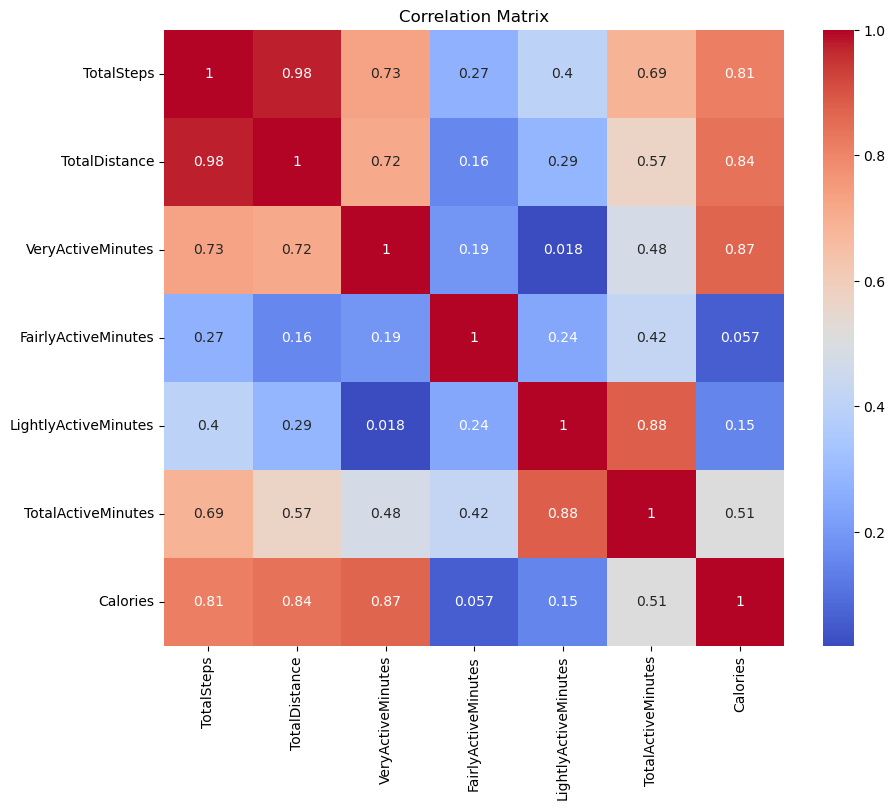

In [422]:
# Select columns
selected_columns = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'TotalActiveMinutes', 'Calories']

# Select the desired columns from merge_df3
selected_data = merge_df3[selected_columns]

# Calculate correlation matrix for the selected columns
correlation_matrix = selected_data.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [423]:
# Print the correlation matrix
print(correlation_matrix)

                      TotalSteps  TotalDistance  VeryActiveMinutes  \
TotalSteps              1.000000       0.976498           0.727767   
TotalDistance           0.976498       1.000000           0.715332   
VeryActiveMinutes       0.727767       0.715332           1.000000   
FairlyActiveMinutes     0.270096       0.155278           0.194059   
LightlyActiveMinutes    0.398430       0.285196           0.017849   
TotalActiveMinutes      0.686390       0.570237           0.475181   
Calories                0.812263       0.841442           0.868277   

                      FairlyActiveMinutes  LightlyActiveMinutes  \
TotalSteps                       0.270096              0.398430   
TotalDistance                    0.155278              0.285196   
VeryActiveMinutes                0.194059              0.017849   
FairlyActiveMinutes              1.000000              0.240027   
LightlyActiveMinutes             0.240027              1.000000   
TotalActiveMinutes               0.42

Comparing the correlations:

1. Calories and TotalActiveMinutes: There is a moderate positive correlation (0.51) between the calories burned and the total active minutes. This suggests that both variables are positively related, and as the total active minutes increase, the calorie expenditure tends to increase as well.

2. Calories and LightlyActiveMinutes: There is a weak positive correlation (0.15) between the calories burned and the lightly active minutes. This indicates a slight positive relationship between these two variables, but the correlation is not as strong as in other cases. It suggests that there is some association between lightly active minutes and calorie expenditure, but it is not as significant.

3. Calories and FairlyActiveMinutes: There is a very weak positive correlation (0.057) between the calories burned and the fairly active minutes. This implies a minimal and not significant relationship between these two variables. The correlation is weak, suggesting that there is little impact on calorie burn.

4. Calories and VeryActiveMinutes: There is a strong positive correlation (0.87) between the calories burned and the very active minutes. This indicates a significant positive relationship between these two variables. As the duration of very active activities increases, the calorie expenditure also increases significantly.

5. Calories and TotalDistance: There is a strong positive correlation (0.84) between the calories burned and the total distance covered. This indicates that as the distance covered increases, the calorie expenditure also tends to increase.

6. Calories and TotalSteps: There is a strong positive correlation (0.81) between the calories burned and the total number of steps taken. This suggests that as the step count increases, the calorie expenditure also tends to increase.


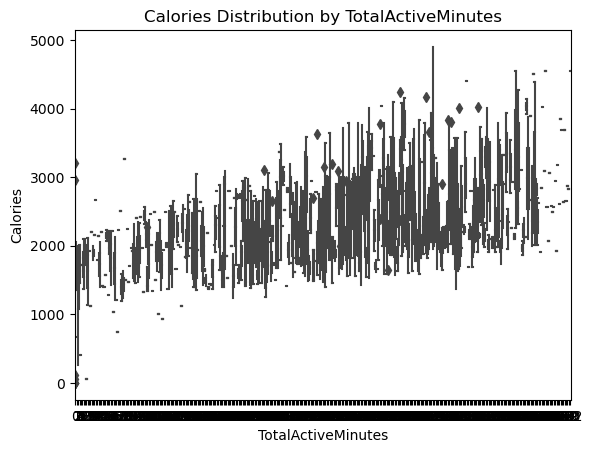

In [424]:
# Creating a box plot to compare Calories across different levels of TotalActiveMinutes
sns.boxplot(x=daily_activity['TotalActiveMinutes'], y=daily_activity['Calories'])
plt.xlabel('TotalActiveMinutes')
plt.ylabel('Calories')
plt.title('Calories Distribution by TotalActiveMinutes')
plt.show()


From the box plot, we can observe that as TotalActiveMinutes increase, there is a general trend of higher calorie expenditure. The boxes for higher TotalActiveMinutes levels are positioned higher on the y-axis, indicating a higher median calorie value. This suggests that individuals who engage in more active minutes tend to burn more calories.

This finding implies a positive correlation between TotalActiveMinutes and calorie burning. It reinforces the notion that increased physical activity leads to a higher energy expenditure.

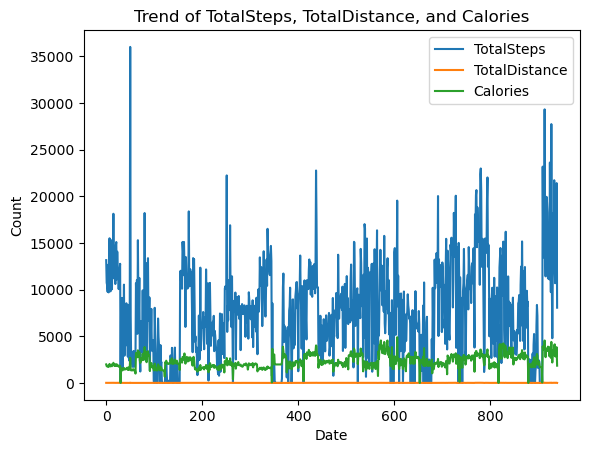

In [425]:
# Plotting TotalSteps, TotalDistance, and Calories over time
plt.plot(daily_activity.index, daily_activity['TotalSteps'], label='TotalSteps')
plt.plot(daily_activity.index, daily_activity['TotalDistance'], label='TotalDistance')
plt.plot(daily_activity.index, daily_activity['Calories'], label='Calories')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trend of TotalSteps, TotalDistance, and Calories')
plt.legend()
plt.show()


The line plot clearly illustrates the relationship between TotalSteps, TotalDistance, and Calories. It shows that as TotalSteps and TotalDistance increase over time, there is a corresponding increase in the number of calories burned.

This finding suggests a positive correlation between physical activity, represented by TotalSteps and TotalDistance, and energy expenditure, represented by Calories. As individuals take more steps and cover greater distances, they tend to burn more calories.

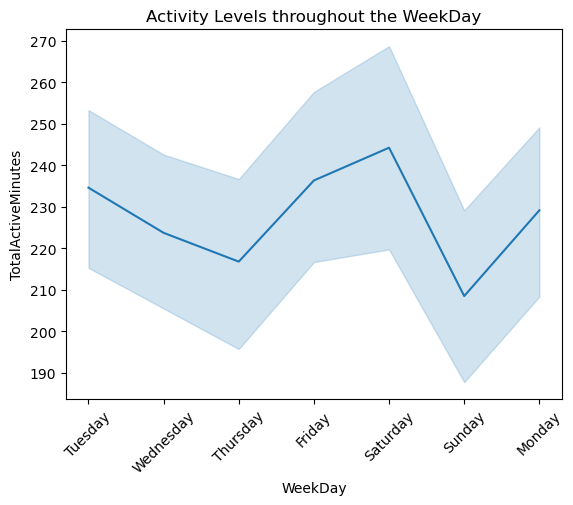

In [426]:
# Create a line plot to visualize activity levels throughout the WeekDay
sns.lineplot(x='WeekDay', y='TotalActiveMinutes', data=daily_activity)

# Set the axis labels and title
plt.xlabel('WeekDay')
plt.ylabel('TotalActiveMinutes')
plt.title('Activity Levels throughout the WeekDay')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


The line plot clearly demonstrates the variations in TotalActiveMinutes throughout the weekdays. It shows that there is a pattern of increased activity levels during the weekend (Friday and Saturday), followed by a decrease on Sunday. The activity levels then gradually increase again on Monday, followed by a decrease from Tuesday until Thursday.

This visualization provides valuable insights into the activity patterns throughout the week, highlighting the potential impact of weekends on activity levels. It suggests that people might engage in more active behaviors during their free time on weekends, resulting in higher TotalActiveMinutes. On the other hand, activity levels tend to be lower during weekdays, possibly due to work or other daily commitments.

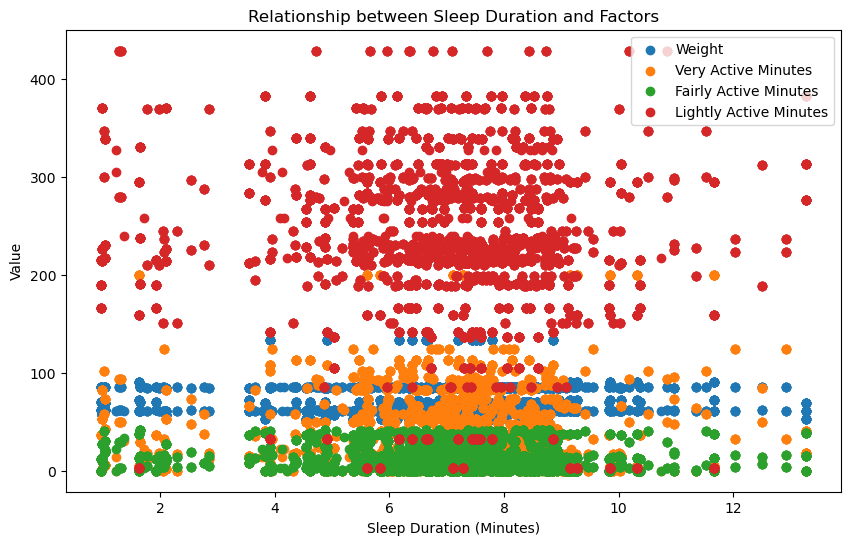

In [427]:
# Relationship between sleep duration (TotalMinutesAsleep), weight (Weightkg), very active minutes (VeryActiveMinutes), fairly active minutes (FairlyActiveMinutes), and lightly active minutes (LightlyActiveMinutes)

# Retrieve the relevant columns from the dataset
weight_data = merge_df3[['ActivityDate', 'Weightkg']]
activity_data = merge_df3[['ActivityDate', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]
sleep_data = merge_df2[['ActivityDay', 'TotalMinutesAsleep']]
calorie_data = merge_df3[['ActivityDate', 'Calories']]

# Merge the dataframes based on the date column
merged_data = pd.merge(weight_data, activity_data, on='ActivityDate')
merged_data = pd.merge(merged_data, sleep_data, left_on='ActivityDate', right_on='ActivityDay')
merged_data = pd.merge(merged_data, calorie_data, on='ActivityDate')

# Create scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['TotalMinutesAsleep'], merged_data['Weightkg'], label='Weight')
plt.scatter(merged_data['TotalMinutesAsleep'], merged_data['VeryActiveMinutes'], label='Very Active Minutes')
plt.scatter(merged_data['TotalMinutesAsleep'], merged_data['FairlyActiveMinutes'], label='Fairly Active Minutes')
plt.scatter(merged_data['TotalMinutesAsleep'], merged_data['LightlyActiveMinutes'], label='Lightly Active Minutes')

plt.xlabel('Sleep Duration (Minutes)')
plt.ylabel('Value')
plt.title('Relationship between Sleep Duration and Factors')
plt.legend()
plt.show()



In [428]:
# Print the results
print("Scatter plot results:")
print(merged_data)

Scatter plot results:
     ActivityDate   Weightkg  VeryActiveMinutes  FairlyActiveMinutes  \
0      2016-05-02  52.599998                 41                   15   
1      2016-05-02  52.599998                 41                   15   
2      2016-05-02  52.599998                 41                   15   
3      2016-05-02  52.599998                 41                   15   
4      2016-05-02  52.599998                 41                   15   
...           ...        ...                ...                  ...   
5097   2016-04-26  85.099998                 22                    3   
5098   2016-04-26  85.099998                 22                    3   
5099   2016-04-26  85.099998                 22                    3   
5100   2016-04-26  85.099998                 22                    3   
5101   2016-04-26  85.099998                 22                    3   

      LightlyActiveMinutes  SedentaryMinutes ActivityDay  TotalMinutesAsleep  \
0                      277       

Insights:
* Sleep Duration and Weight:
There doesn't appear to be a clear linear relationship between sleep duration and weight. The data points are scattered and don't follow a specific pattern.
* Sleep Duration and Activity Levels:
    - Very Active Minutes: There seems to be a slight positive relationship between sleep duration and very active minutes. As sleep duration increases, the very active minutes also tend to increase, although the relationship is not very strong.
    - Fairly Active Minutes: There doesn't seem to be a strong relationship between sleep duration and fairly active minutes. The data points are scattered and don't show a clear trend.
    - Lightly Active Minutes: There is no clear relationship between sleep duration and lightly active minutes. The data points are widely spread and don't show a consistent pattern.
These relationships suggest that sleep duration may have some influence on very active minutes, but the relationships with other activity levels (fairly active, lightly active, sedentary) are less pronounced.

In [429]:
# Check the correlation coefficients
correlation = merged_data[['TotalMinutesAsleep', 'Weightkg', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].corr()
print(correlation)


                      TotalMinutesAsleep  Weightkg  VeryActiveMinutes  \
TotalMinutesAsleep              1.000000 -0.003942          -0.001233   
Weightkg                       -0.003942  1.000000           0.055173   
VeryActiveMinutes              -0.001233  0.055173           1.000000   
FairlyActiveMinutes            -0.033633 -0.029147           0.199422   
LightlyActiveMinutes           -0.043177 -0.193327          -0.029504   
SedentaryMinutes               -0.018524  0.027001           0.121648   
Calories                       -0.012008  0.064087           0.209647   

                      FairlyActiveMinutes  LightlyActiveMinutes  \
TotalMinutesAsleep              -0.033633             -0.043177   
Weightkg                        -0.029147             -0.193327   
VeryActiveMinutes                0.199422             -0.029504   
FairlyActiveMinutes              1.000000              0.249721   
LightlyActiveMinutes             0.249721              1.000000   
SedentaryMinu

Based on the correlation coefficients, it seems that there is a weak negative correlation between TotalMinutesAsleep and Weightkg, indicating that as sleep duration increases, weight tends to slightly decrease. The other correlations with TotalMinutesAsleep are also weak and do not indicate strong relationships.

# 6. Act phase

Final insights:


* Sedentary Behavior: The data highlights the need to promote less sedentary time and encourage more active behaviors. Users, on average, spend approximately 1218.75 minutes in sedentary activities.
* Activity Levels: TotalActiveMinutes, calculated as the sum of very active, fairly active, and lightly active minutes, provides insights into users' activity levels. The average TotalActiveMinutes is 227.54 minutes, with a range of 0 to 552 minutes. Understanding this distribution helps identify typical activity levels among users and potential areas for improvement.
* Calorie Expenditure: Users, on average, burned approximately 2304 calories, with a range of 0 to 4900 calories. The distribution highlights diversity in calorie burn and indicates the need to consider individual differences in energy expenditure.
* Relationships Between Variables:
    - There is a moderate positive correlation (0.51) between Calories and TotalActiveMinutes, suggesting that as the total active minutes increase, the calorie expenditure tends to increase as well.
    - VeryActiveMinutes, TotalDistance, and TotalSteps show strong positive correlations with Calories, indicating that higher levels of very active minutes, total distance covered, and total steps taken are associated with higher calorie burn.
* Sleep Duration and Weight: There doesn't appear to be a clear linear relationship between sleep duration and weight. The data points are scattered and don't follow a specific pattern.
* Sleep Duration and Activity Levels: There is a slight positive relationship between sleep duration and very active minutes. Other activity levels (fairly active, lightly active) don't show strong relationships with sleep duration.



Answering the business questions:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

* Trends in Smart Device Usage:

1. Trends in Smart Device Usage:
   - Increased awareness and monitoring of physical activity: Users are becoming more conscious of their activity levels, as indicated by the tracking of steps, distance, and active minutes. This trend suggests a growing interest in health and fitness monitoring.
   - Focus on sedentary behavior: Users are recognizing the importance of reducing sedentary behavior and increasing overall activity levels. This trend aligns with the shift towards promoting a more active lifestyle and avoiding prolonged sitting or inactivity.
   - Integration of sleep tracking: Sleep duration and quality are gaining attention, with users monitoring their sleep patterns and aiming for sufficient rest. This trend reflects the growing recognition of the importance of sleep in overall well-being and the desire to improve sleep habits.
   - Calorie tracking and energy balance: Users are monitoring calorie expenditure and intake, suggesting a focus on maintaining a balanced energy equation. This trend indicates an interest in understanding and managing their calorie-related goals for weight management and overall health.

2. Application to Bellabeat Customers:
   - Bellabeat's customers, primarily women interested in holistic well-being, can benefit from the trends in smart device usage by:
     - Gaining insights into their activity levels, sedentary behavior, sleep patterns, and calorie expenditure to make informed decisions about their health and well-being.
     - Monitoring and managing their energy balance, promoting healthy eating habits, and achieving their weight management goals.
     - Enhancing their awareness of the importance of sleep and adopting strategies for improving sleep quality.
     - Engaging in personalized activity recommendations, based on their unique goals and preferences, to promote an active and balanced lifestyle.

3. Influence on Bellabeat Marketing Strategy:
   - Emphasize the features and benefits of Bellabeat's smart devices that align with the identified trends, such as activity tracking, sedentary behavior reminders, sleep monitoring, and calorie tracking.
   - Highlight the holistic approach to well-being that Bellabeat offers, focusing on the integration of physical activity, sleep, and nutrition for optimal health outcomes.
   - Tailor marketing messages to address the specific needs and interests of Bellabeat's target audience, emphasizing the importance of maintaining an active lifestyle, managing sedentary behavior, and achieving a balanced energy equation.
   - Showcase success stories and testimonials from Bellabeat customers who have experienced positive changes in their health and well-being through the use of smart devices and the adoption of healthy habits.
   - Utilize data-driven insights to customize and personalize marketing campaigns, delivering targeted messages to individuals based on their activity levels, sleep patterns, and calorie-related goals.

By aligning with the trends in smart device usage, Bellabeat can cater to the evolving needs and preferences of their customers, provide value-added features, and differentiate themselves in the market as a brand focused on comprehensive well-being and personalized experiences.